In [16]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast


movies_df = pd.read_csv('Desktop/movies_metadata.csv', low_memory=False)


print(movies_df.head())
print(movies_df.info())
print(movies_df.isnull().sum())

# Drop rows with missing 'genres' or 'release_date' in movies_df
movies_df = movies_df.dropna(subset=['genres', 'release_date'])

   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497         

In [17]:
movies_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Convert 'release_date' to datetime in movies_df
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')
movies_df.columns = movies_df.columns.str.strip()

In [19]:
# Extract year from release date in movies_df
movies_df['release_year'] = movies_df['release_date'].dt.year

# Convert 'budget' and 'revenue' to numeric in movies_df
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce')
movies_df['revenue'] = pd.to_numeric(movies_df['revenue'], errors='coerce')

# Calculate profit in movies_df
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']

In [20]:
def extract_genres(genre_str):
    if not genre_str or genre_str == "[]":
        return ["Unknown"]
    
    try:
        genre_list = ast.literal_eval(genre_str)  # Convert string to list of dictionaries
        return [genre['name'] for genre in genre_list]  # Extract genre names
    except (ValueError, SyntaxError):
        return ["Unknown"]

movies_df["cleaned_genres"] = movies_df["genres"].apply(extract_genres)

# One-hot encoding genres
all_genres = set(genre for sublist in movies_df["cleaned_genres"] for genre in sublist)  # Get unique genres

for genre in all_genres:
    movies_df[genre] = movies_df["cleaned_genres"].apply(lambda x: 1 if genre in x else 0)



print(movies_df)

       adult                              belongs_to_collection      budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000.0   
1      False                                                NaN  65000000.0   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0.0   
3      False                                                NaN  16000000.0   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0.0   
...      ...                                                ...         ...   
45460  False                                                NaN         0.0   
45462  False                                                NaN         0.0   
45463  False                                                NaN         0.0   
45464  False                                                NaN         0.0   
45465  False                                                NaN         0.0   

                                                  g

In [21]:
movies_df.iloc[:,:13]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]"
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'..."
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,False,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,/fQC46NglNiEMZBv5XHoyLuOWoN5.jpg,"[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'..."
45462,False,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]"
45463,False,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]"
45464,False,NaN,0.0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,"[{'name': 'Yermoliev', 'id': 88753}]"


In [22]:
movies_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'release_year', 'profit',
       'cleaned_genres', 'Family', 'Documentary', 'Vision View Entertainment',
       'Rogue State', 'The Cartel', 'Carousel Productions', 'Aniplex',
       'Adventure', 'Telescene Film Group Productions', 'Crime', 'Action',
       'Fantasy', 'BROSTA TV', 'Mystery', 'Pulser Productions', 'Romance',
       'War', 'Unknown', 'History', 'Music', 'Western', 'Animation',
       'Science Fiction', 'Comedy', 'Drama', 'Horror', 'Thriller',
       'Mardock Scramble Production Committee', 'TV Movie', 'Sentai Filmworks',
       'Odyssey Media', 'GoHands', 'Foreign'],
      dtype='object')

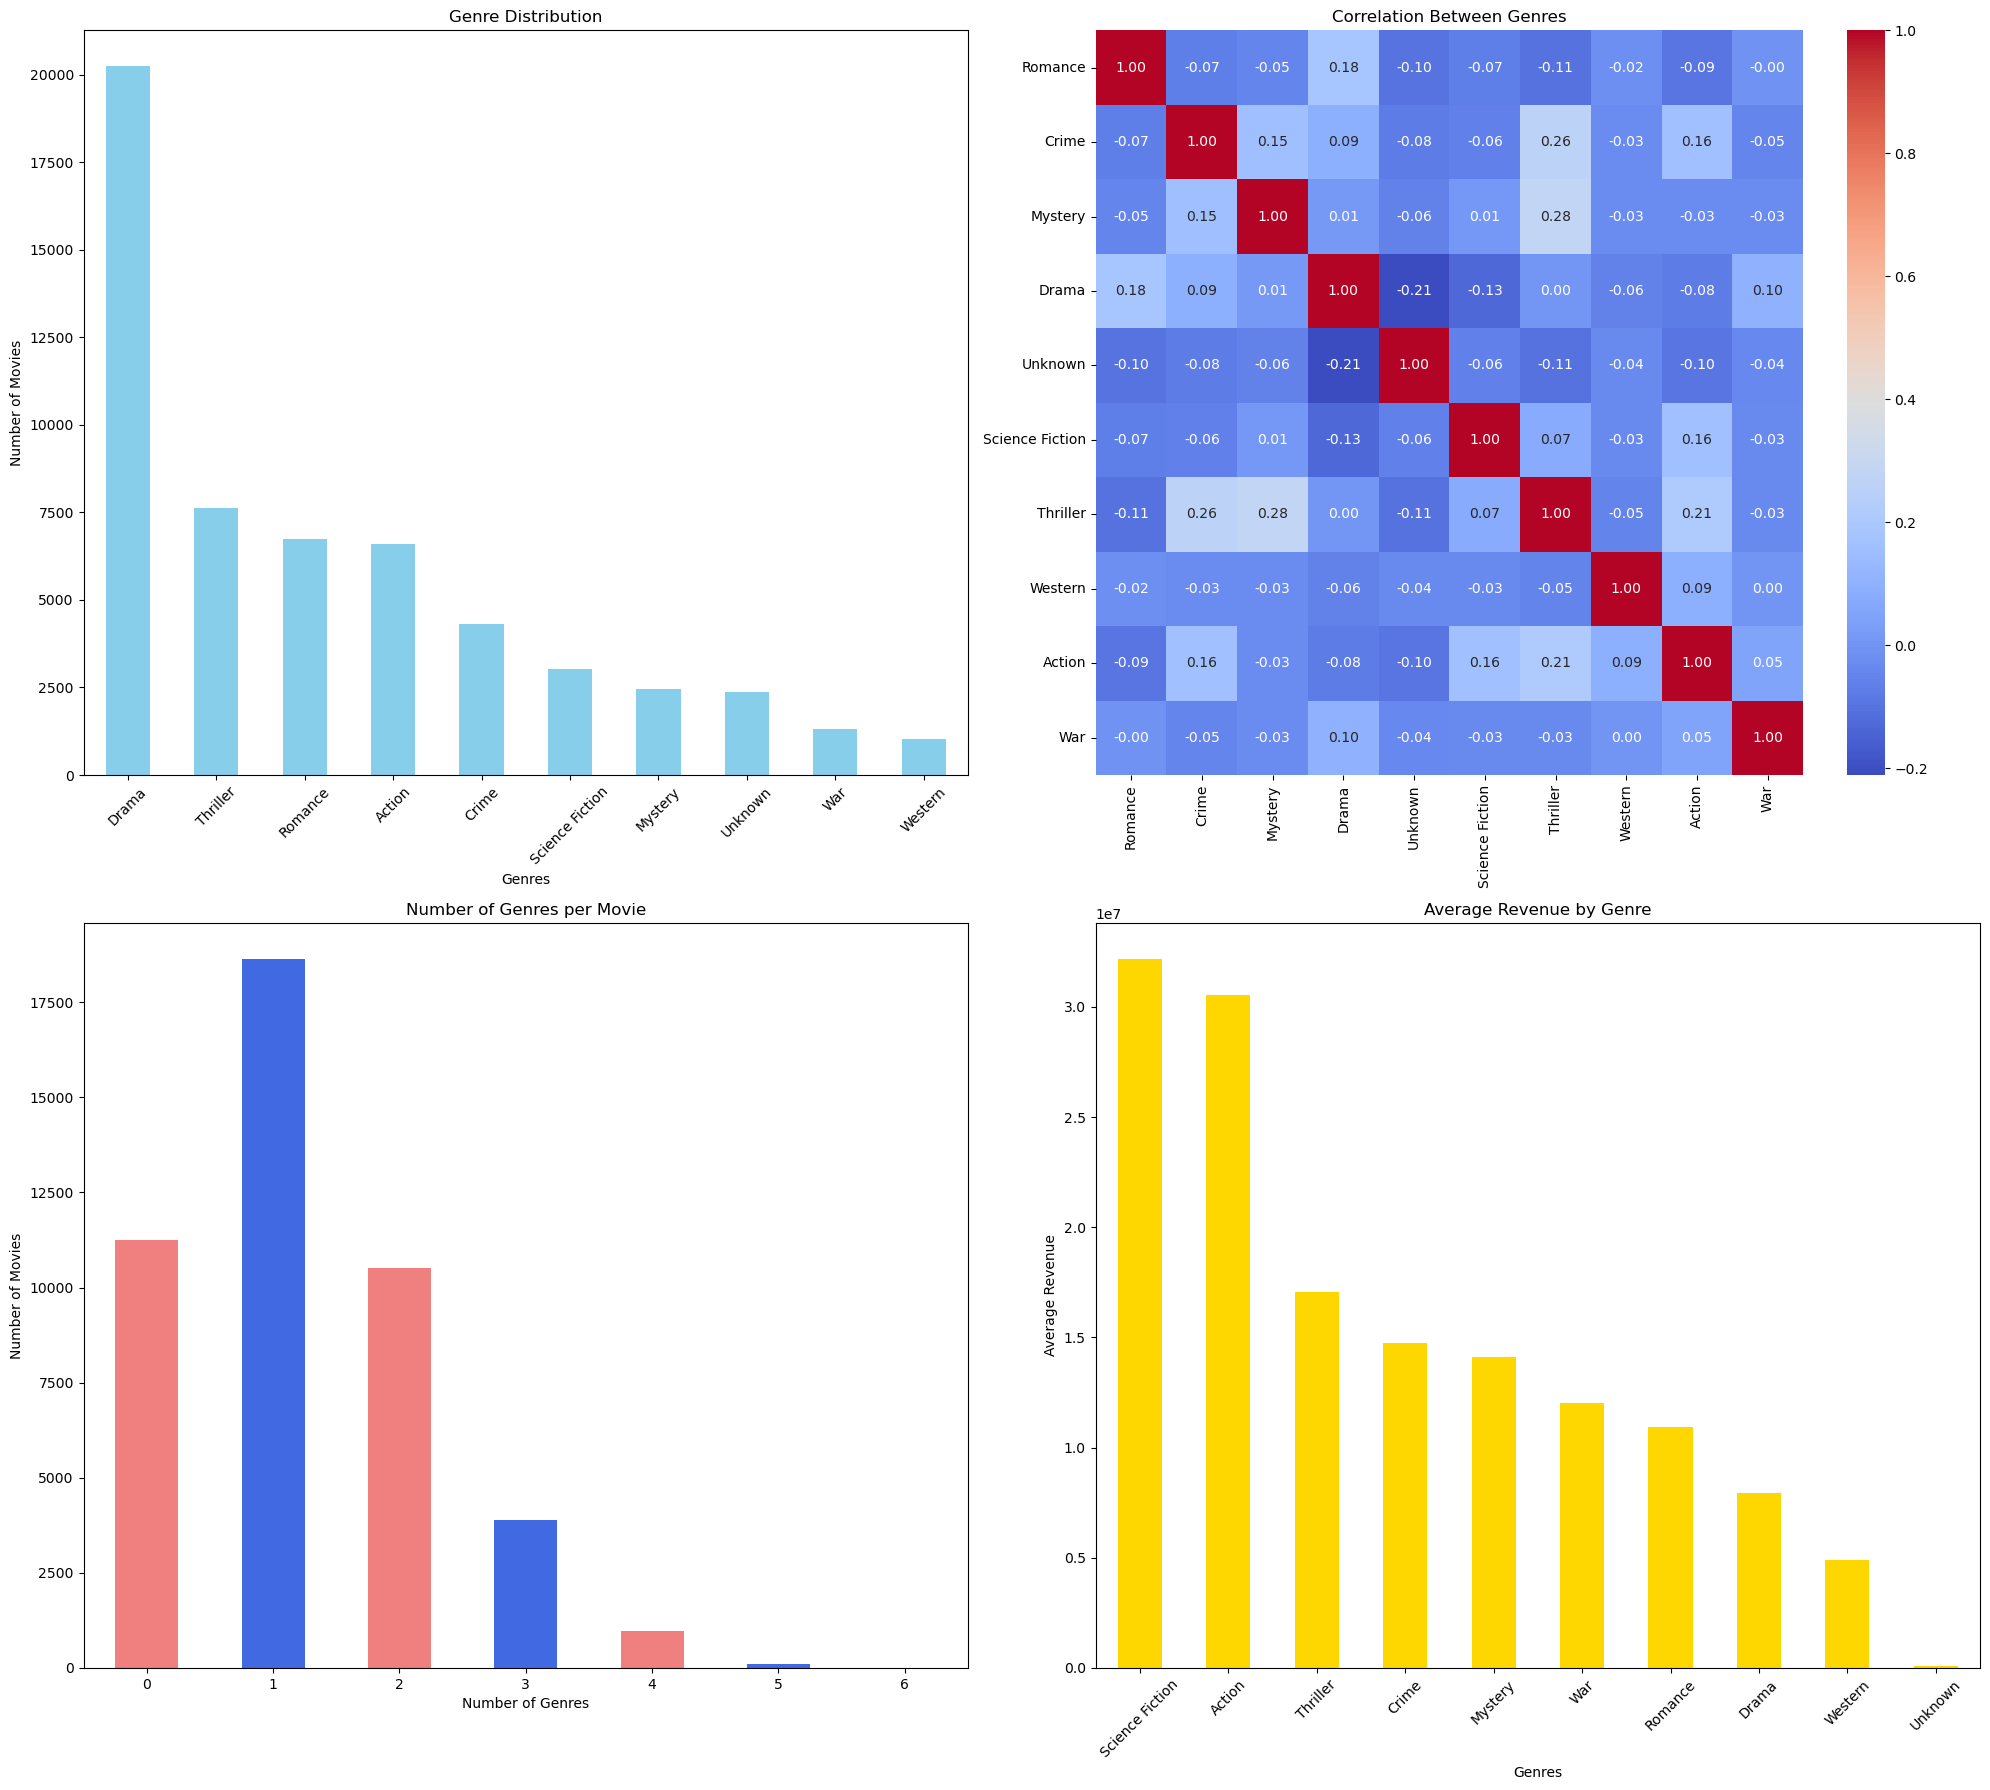

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the binary genre columns for analysis
genre_columns = ["Romance", "Crime", "Mystery", "Drama", "Unknown", "Science Fiction", 
                 "Thriller", "Western", "Action", "War"]

# 1. Genre Distribution Bar Chart
plt.figure(figsize=(20, 18))
plt.subplot(2, 2, 1)
genre_counts = movies_df[genre_columns].sum().sort_values(ascending=False)  # Count occurrences of each genre (sum of 1s for each genre column)
genre_counts.plot(kind="bar", color="skyblue")
plt.title("Genre Distribution")
plt.xlabel("Genres")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)

# 2. Genre Correlation Heatmap
plt.subplot(2, 2, 2)
sns.heatmap(movies_df[genre_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Genres")

# 3. Number of Genres per Movie Bar Chart
plt.subplot(2, 2, 3)
movies_df["num_genres"] = movies_df[genre_columns].sum(axis=1)  # Count how many genres each movie has (sum across genre columns)
single_vs_multi = movies_df["num_genres"].value_counts().sort_index()  # Count occurrences of single vs multi-genres
single_vs_multi.plot(kind="bar", color=["lightcoral", "royalblue"])
plt.title("Number of Genres per Movie")
plt.xlabel("Number of Genres")
plt.ylabel("Number of Movies")
plt.xticks(rotation=0)

# 4. Average Revenue by Genre Bar Chart
plt.subplot(2, 2, 4)
genre_revenue = movies_df[genre_columns].mul(movies_df["revenue"], axis=0)  # Multiply genres with revenue for each movie
avg_revenue = genre_revenue.sum() / movies_df[genre_columns].sum()  # Average revenue per genre
avg_revenue.sort_values(ascending=False).plot(kind="bar", color="gold")
plt.title("Average Revenue by Genre")
plt.xlabel("Genres")
plt.ylabel("Average Revenue")
plt.xticks(rotation=45)

# Show the figure with all subplots
plt.tight_layout()
plt.show()


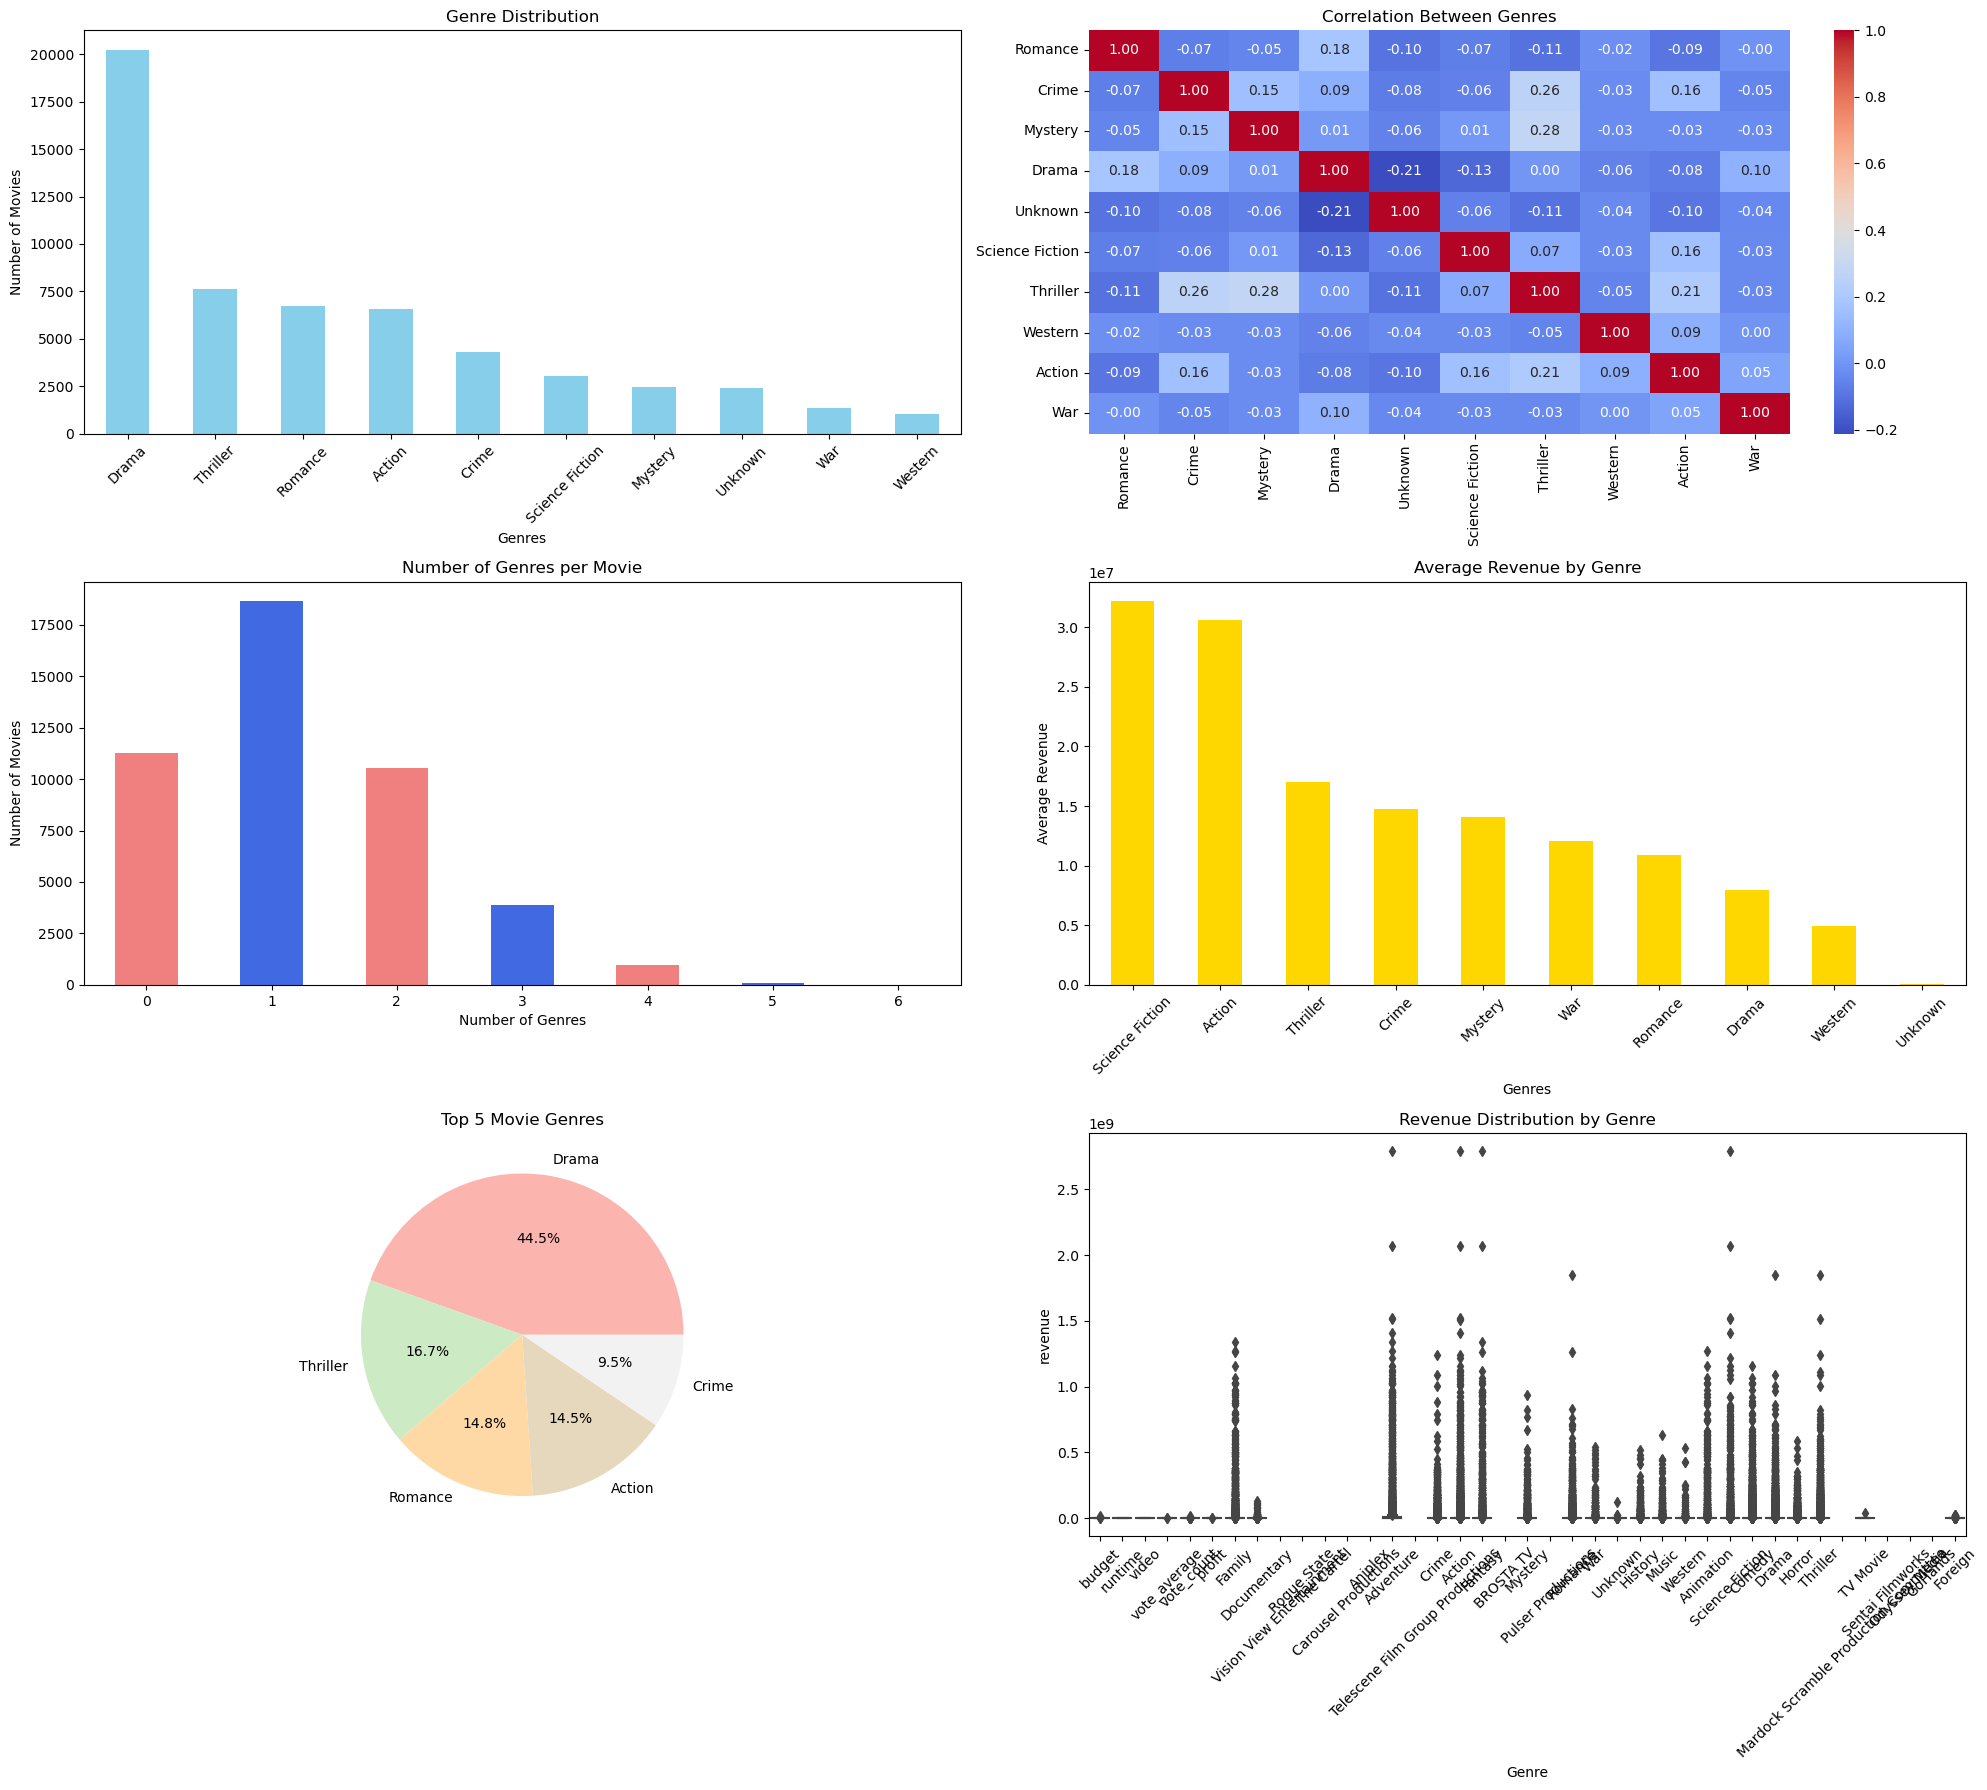

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Ensure your DataFrame 'movies_df' is defined before this code

# Select only the binary genre columns for analysis
genre_columns = ["Romance", "Crime", "Mystery", "Drama", "Unknown", "Science Fiction", 
                 "Thriller", "Western", "Action", "War"]

# 1. Genre Distribution Bar Chart
plt.figure(figsize=(20, 18))
plt.subplot(3, 2, 1)
genre_counts = movies_df[genre_columns].sum().sort_values(ascending=False)  # Count occurrences of each genre (sum of 1s for each genre column)
genre_counts.plot(kind="bar", color="skyblue")
plt.title("Genre Distribution")
plt.xlabel("Genres")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)

# 2. Genre Correlation Heatmap
plt.subplot(3, 2, 2)
sns.heatmap(movies_df[genre_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Genres")

# 3. Number of Genres per Movie Bar Chart
plt.subplot(3, 2, 3)
movies_df["num_genres"] = movies_df[genre_columns].sum(axis=1)  # Count how many genres each movie has (sum across genre columns)
single_vs_multi = movies_df["num_genres"].value_counts().sort_index()  # Count occurrences of single vs multi-genres
single_vs_multi.plot(kind="bar", color=["lightcoral", "royalblue"])
plt.title("Number of Genres per Movie")
plt.xlabel("Number of Genres")
plt.ylabel("Number of Movies")
plt.xticks(rotation=0)

# 4. Average Revenue by Genre Bar Chart
plt.subplot(3, 2, 4)
genre_revenue = movies_df[genre_columns].mul(movies_df["revenue"], axis=0)  # Multiply genres with revenue for each movie
avg_revenue = genre_revenue.sum() / movies_df[genre_columns].sum()  # Average revenue per genre
avg_revenue.sort_values(ascending=False).plot(kind="bar", color="gold")
plt.title("Average Revenue by Genre")
plt.xlabel("Genres")
plt.ylabel("Average Revenue")
plt.xticks(rotation=45)

# 5. Top 5 Movie Genres Pie Chart
plt.subplot(3, 2, 5)
top_genres = genre_counts.head(5)
top_genres.plot(kind="pie", autopct="%1.1f%%", cmap="Pastel1")
plt.title("Top 5 Movie Genres")
plt.ylabel("")

# 6. Revenue Distribution by Genre
plt.subplot(3, 2, 6)
genre_cols = [col for col in movies_df.columns if col not in ["revenue", "num_genres"]]  # Exclude non-genre columns
melted_df = movies_df.melt(id_vars=["revenue"], value_vars=genre_cols, var_name="Genre", value_name="Has_Genre")

# Filter to only rows where the movie has that genre
melted_df = melted_df[melted_df["Has_Genre"] == 1]

sns.boxplot(data=melted_df, x="Genre", y="revenue")
plt.xticks(rotation=45)
plt.title("Revenue Distribution by Genre")

plt.tight_layout()
plt.show()



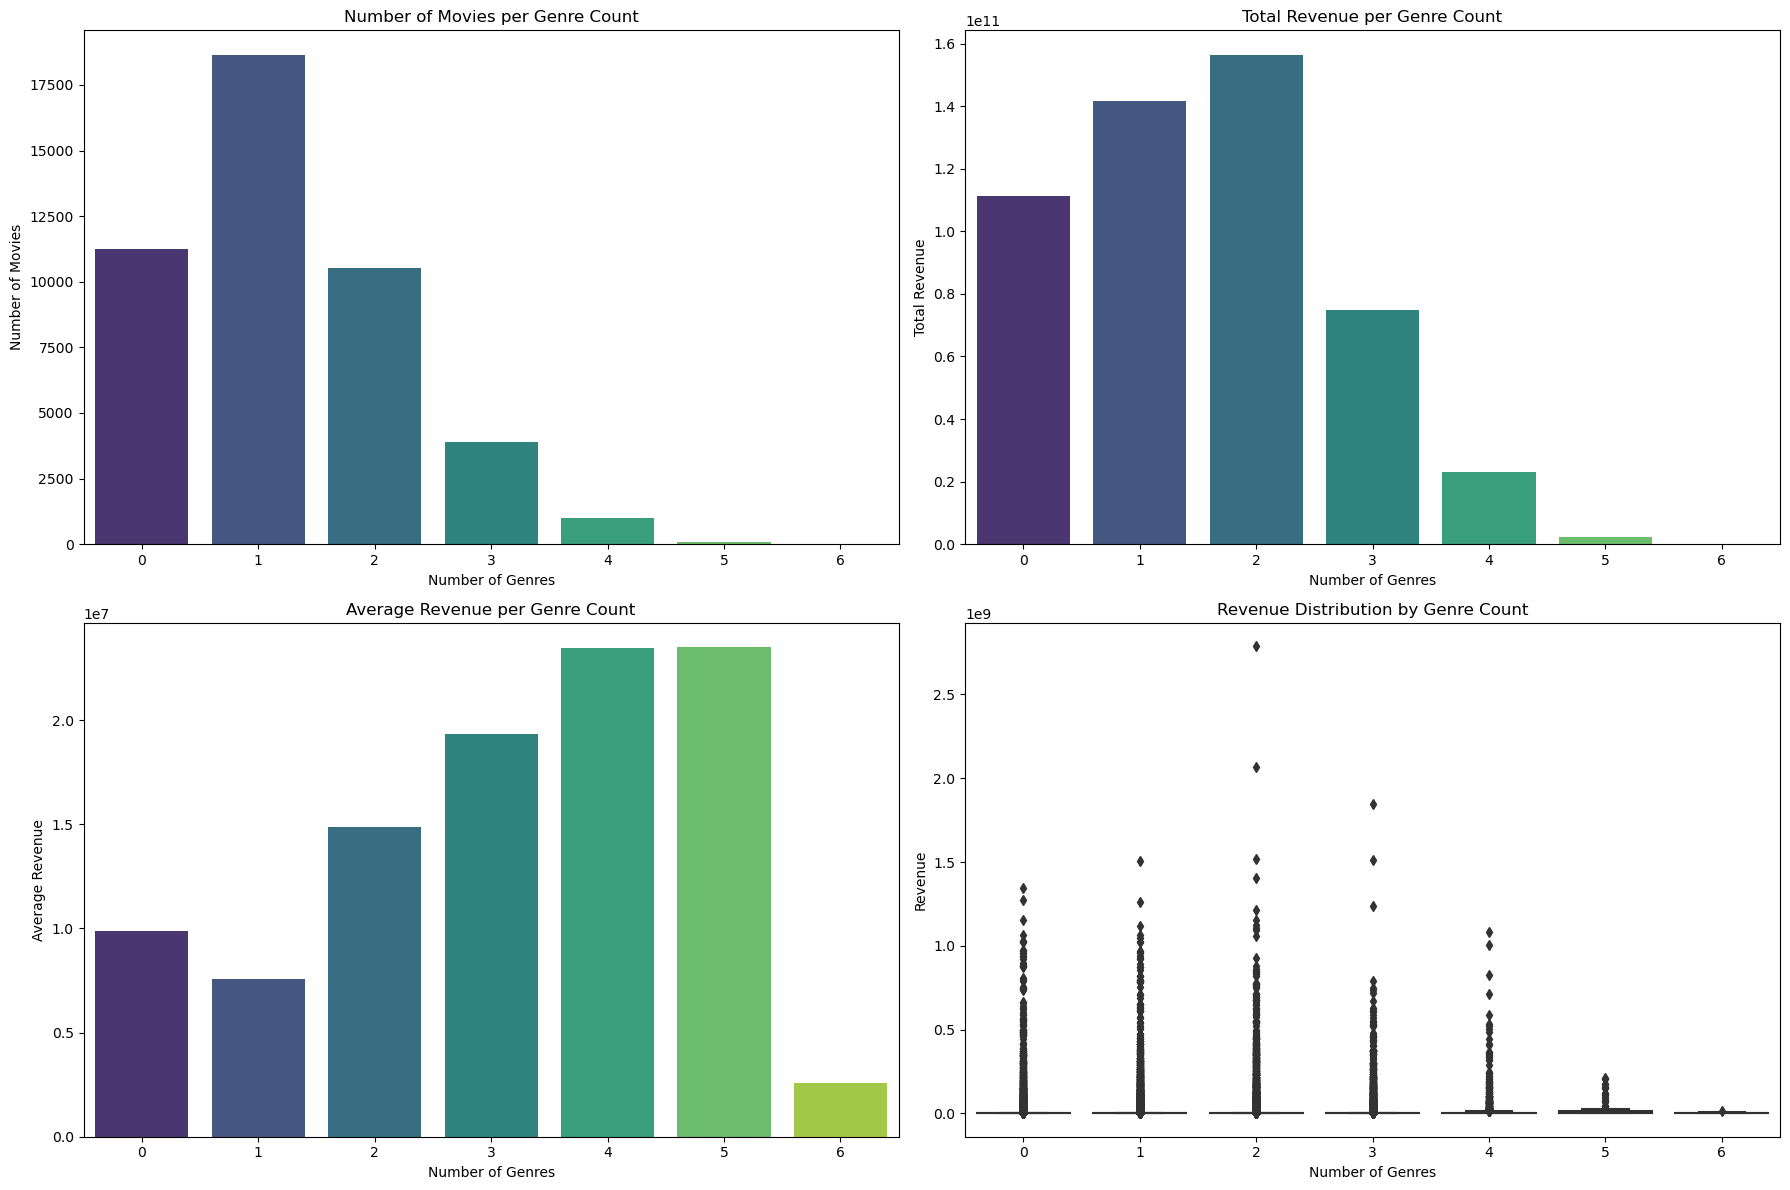

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Ensure your DataFrame 'movies_df' is defined before this code

# Calculate the number of genres each movie belongs to
movies_df["num_genres"] = movies_df[genre_columns].sum(axis=1)

# Group by the number of genres and calculate the total and average revenue for each group
genre_revenue_summary = movies_df.groupby("num_genres").agg({
    "revenue": ["sum", "mean"],
    "id": "count"  # Count number of movies for each genre combination
}).reset_index()
genre_revenue_summary.columns = ["num_genres", "total_revenue", "average_revenue", "number_of_movies"]

# Visualize the data
plt.figure(figsize=(18, 12))

# Number of Movies per Genre Count
plt.subplot(2, 2, 1)
sns.barplot(data=genre_revenue_summary, x="num_genres", y="number_of_movies", palette="viridis")
plt.title("Number of Movies per Genre Count")
plt.xlabel("Number of Genres")
plt.ylabel("Number of Movies")

# Total Revenue per Genre Count
plt.subplot(2, 2, 2)
sns.barplot(data=genre_revenue_summary, x="num_genres", y="total_revenue", palette="viridis")
plt.title("Total Revenue per Genre Count")
plt.xlabel("Number of Genres")
plt.ylabel("Total Revenue")

# Average Revenue per Genre Count
plt.subplot(2, 2, 3)
sns.barplot(data=genre_revenue_summary, x="num_genres", y="average_revenue", palette="viridis")
plt.title("Average Revenue per Genre Count")
plt.xlabel("Number of Genres")
plt.ylabel("Average Revenue")

# Boxplot of Revenue by Genre Count
plt.subplot(2, 2, 4)
sns.boxplot(data=movies_df, x="num_genres", y="revenue", palette="viridis")
plt.title("Revenue Distribution by Genre Count")
plt.xlabel("Number of Genres")
plt.ylabel("Revenue")

# Show the figure with all subplots
plt.tight_layout()
plt.show()


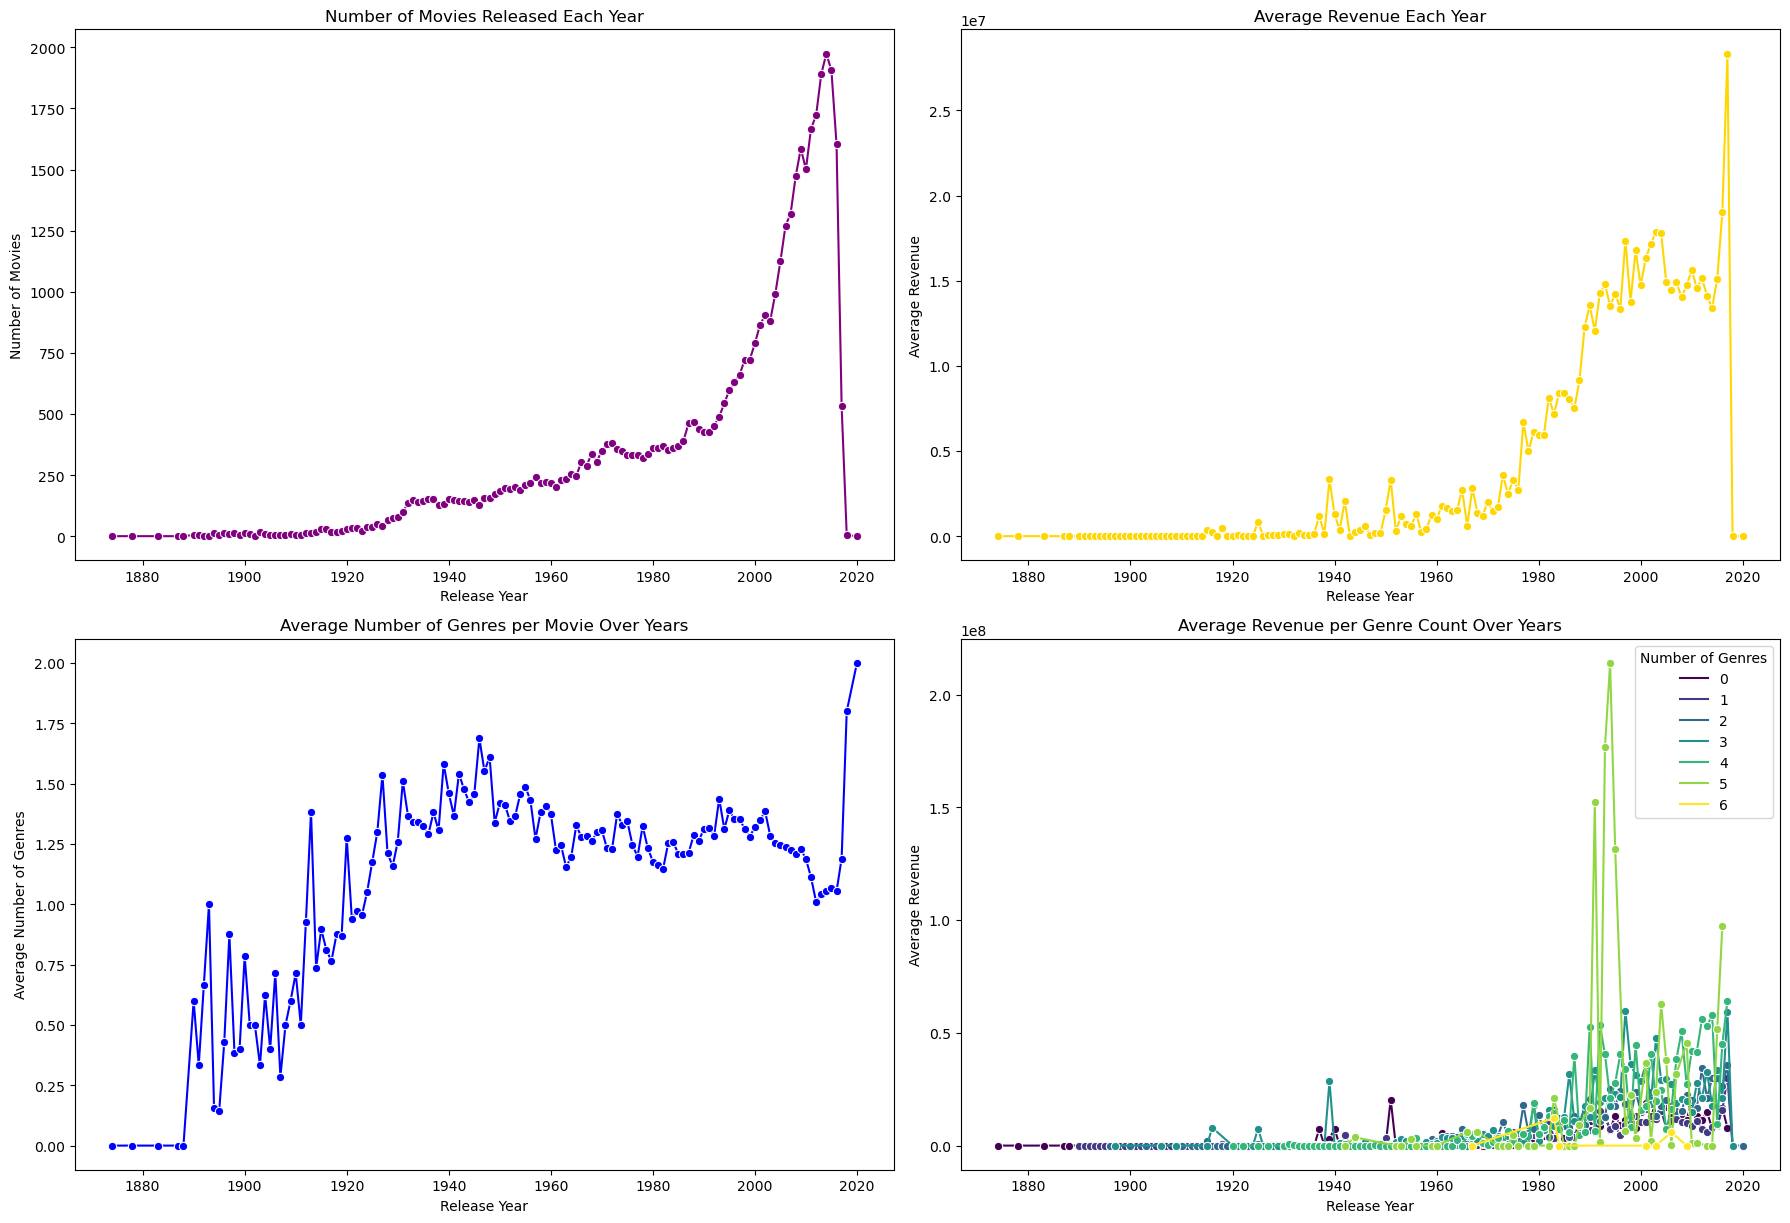

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Ensure your DataFrame 'movies_df' is defined before this code

# Convert 'release_date' to datetime format
movies_df["release_date"] = pd.to_datetime(movies_df["release_date"], errors='coerce')

# Extract year from 'release_date'
movies_df["release_year"] = movies_df["release_date"].dt.year

# Calculate the number of genres each movie belongs to
movies_df["num_genres"] = movies_df[genre_columns].sum(axis=1)

# Group by release year and calculate the average number of genres per movie
year_genre_summary = movies_df.groupby("release_year")["num_genres"].mean().reset_index()

# Group by release year and genre count, then calculate the average revenue
genre_year_revenue_summary = movies_df.groupby(["release_year", "num_genres"])["revenue"].mean().reset_index()

# Additional analysis by release year
yearly_summary = movies_df.groupby("release_year").agg({
    "revenue": ["sum", "mean"],
    "id": "count"
}).reset_index()
yearly_summary.columns = ["release_year", "total_revenue", "average_revenue", "number_of_movies"]

# Visualize the data
plt.figure(figsize=(18, 18))

# Number of Movies Released Each Year
plt.subplot(3, 2, 1)
sns.lineplot(data=yearly_summary, x="release_year", y="number_of_movies", marker='o', color='purple')
plt.title("Number of Movies Released Each Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")

# Average Revenue Each Year
plt.subplot(3, 2, 2)
sns.lineplot(data=yearly_summary, x="release_year", y="average_revenue", marker='o', color='gold')
plt.title("Average Revenue Each Year")
plt.xlabel("Release Year")
plt.ylabel("Average Revenue")

# Average Number of Genres per Movie Over Years
plt.subplot(3, 2, 3)
sns.lineplot(data=year_genre_summary, x="release_year", y="num_genres", marker='o', color='blue')
plt.title("Average Number of Genres per Movie Over Years")
plt.xlabel("Release Year")
plt.ylabel("Average Number of Genres")

# Average Revenue per Genre Count Over Years
plt.subplot(3, 2, 4)
sns.lineplot(data=genre_year_revenue_summary, x="release_year", y="revenue", hue="num_genres", palette="viridis", marker='o')
plt.title("Average Revenue per Genre Count Over Years")
plt.xlabel("Release Year")
plt.ylabel("Average Revenue")
plt.legend(title="Number of Genres")

# Show the figure with all subplots
plt.tight_layout()
plt.show()


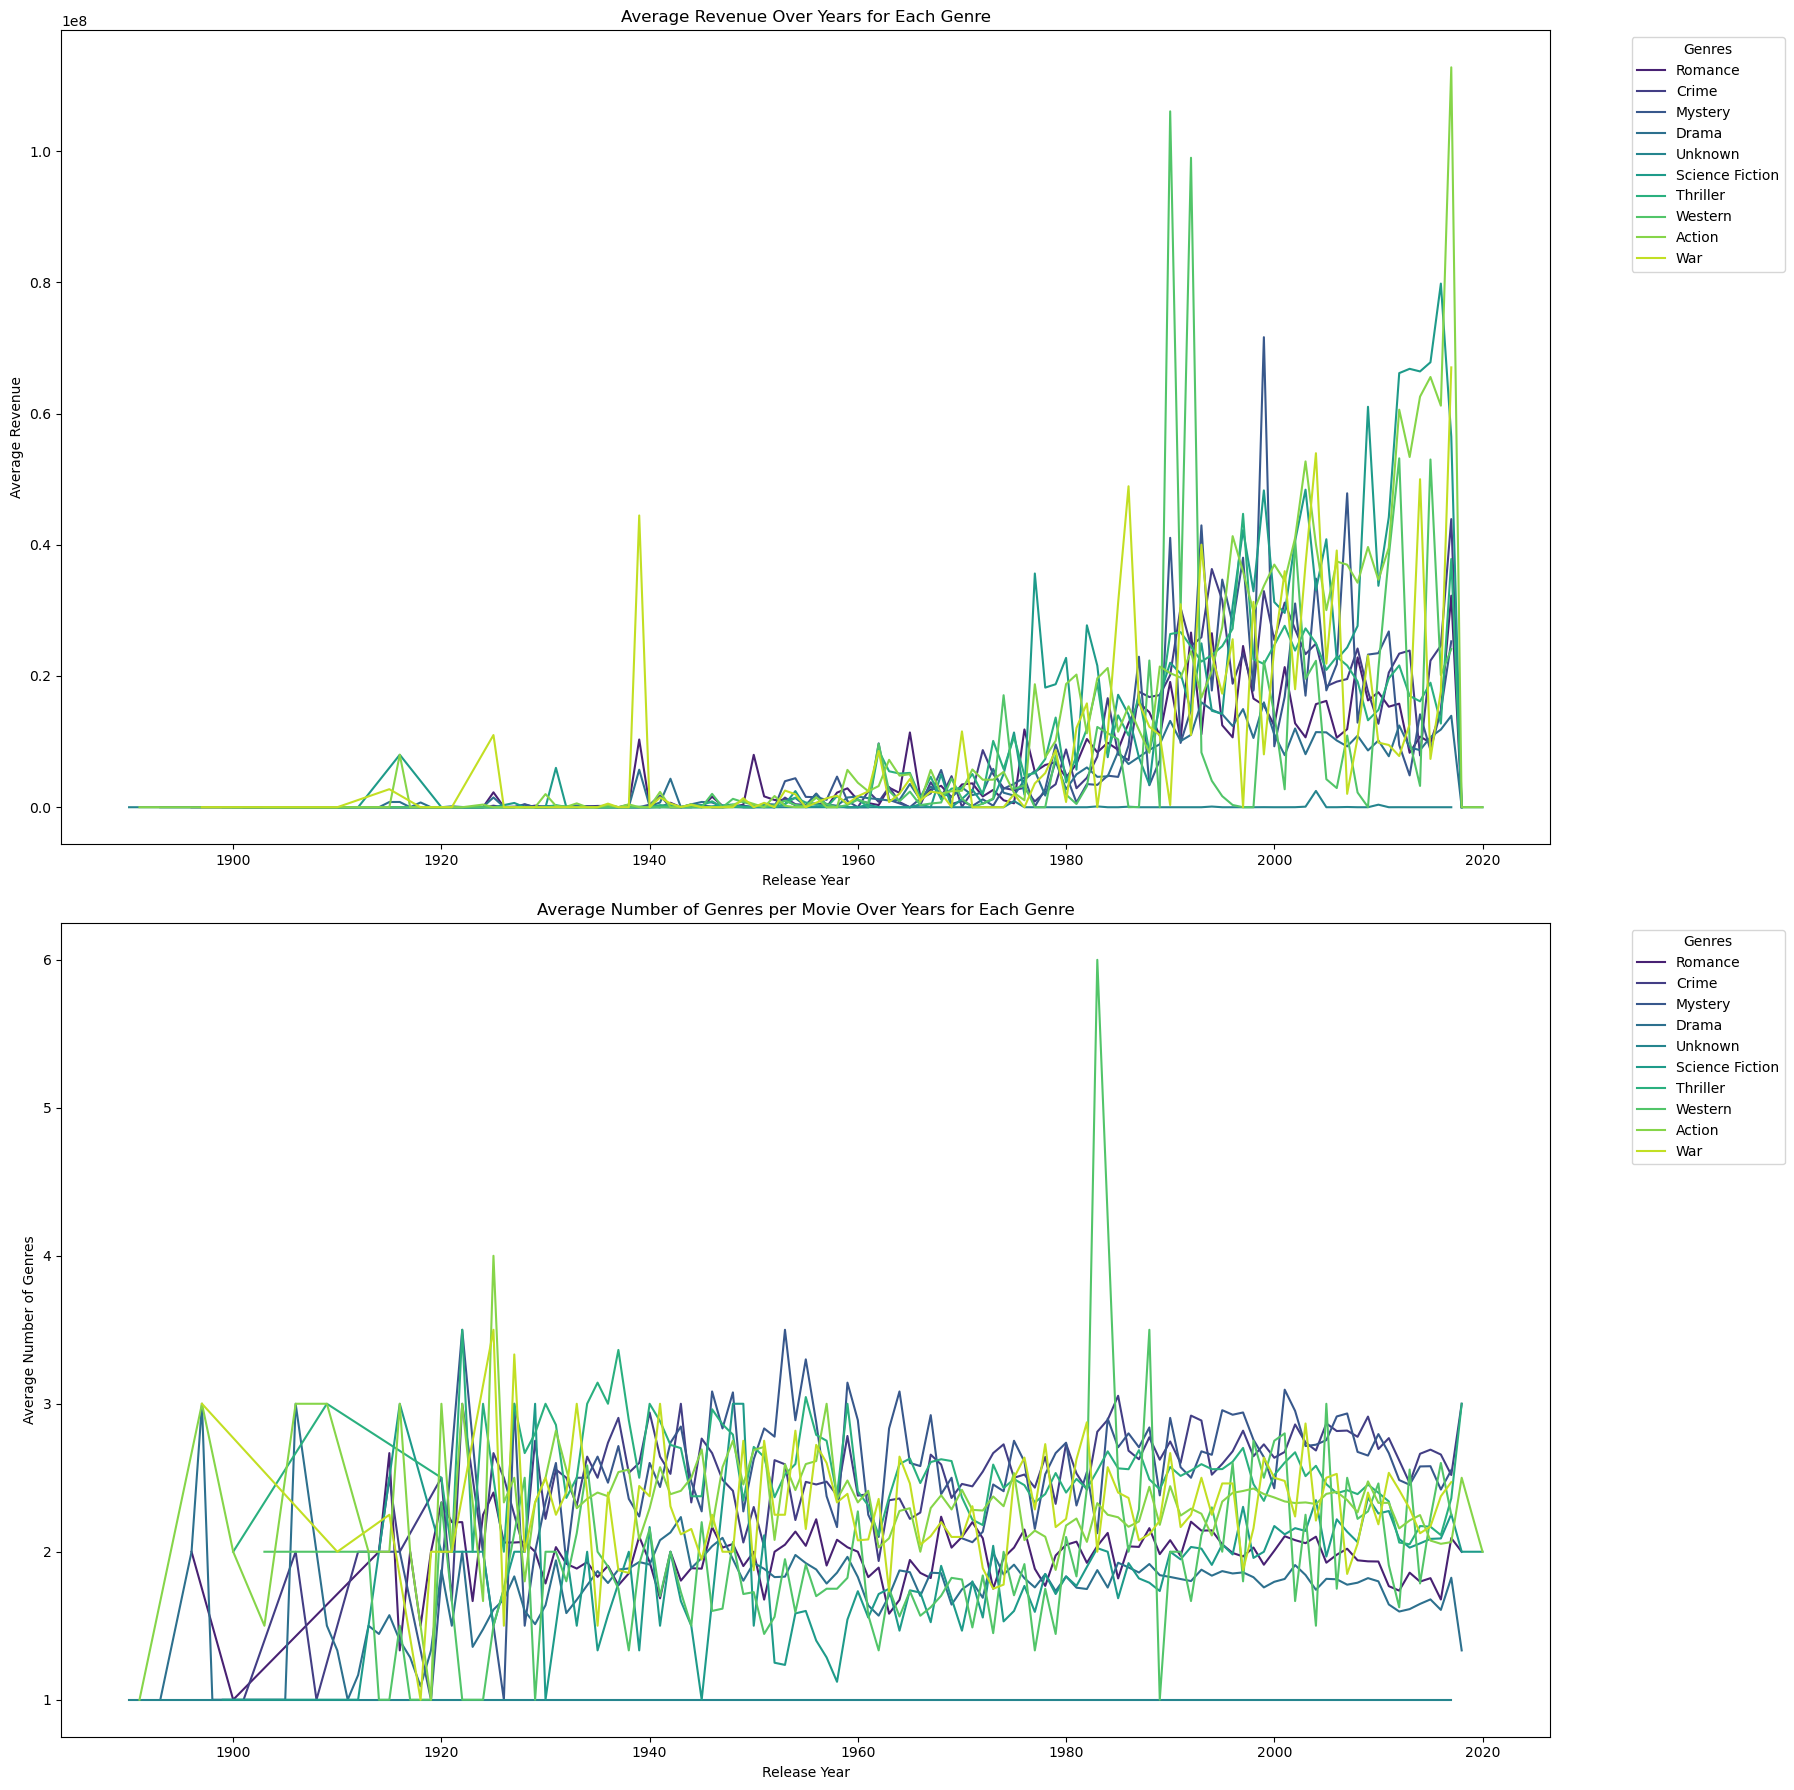

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Ensure your DataFrame 'movies_df' is defined before this code

# Convert 'release_date' to datetime format
movies_df["release_date"] = pd.to_datetime(movies_df["release_date"], errors='coerce')

# Extract year from 'release_date'
movies_df["release_year"] = movies_df["release_date"].dt.year

# Calculate the number of genres each movie belongs to
movies_df["num_genres"] = movies_df[genre_columns].sum(axis=1)

# Initialize lists to store data for each genre
genre_revenue_data = []
genre_num_genres_data = []

# Loop through each genre and calculate revenue and number of genres over years
for genre in genre_columns:
    # Group by release year and calculate total and average revenue for each genre
    revenue_data = movies_df[movies_df[genre] == 1].groupby("release_year")["revenue"].mean().reset_index()
    revenue_data["genre"] = genre
    genre_revenue_data.append(revenue_data)
    
    # Group by release year and calculate average number of genres for each genre
    num_genres_data = movies_df[movies_df[genre] == 1].groupby("release_year")["num_genres"].mean().reset_index()
    num_genres_data["genre"] = genre
    genre_num_genres_data.append(num_genres_data)

# Concatenate data for each genre
genre_revenue_df = pd.concat(genre_revenue_data, ignore_index=True)
genre_num_genres_df = pd.concat(genre_num_genres_data, ignore_index=True)

# Visualize the data
plt.figure(figsize=(18, 18))

# Revenue Over Years for Each Genre
plt.subplot(2, 1, 1)
sns.lineplot(data=genre_revenue_df, x="release_year", y="revenue", hue="genre", palette="viridis")
plt.title("Average Revenue Over Years for Each Genre")
plt.xlabel("Release Year")
plt.ylabel("Average Revenue")
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')

# Number of Genres per Movie Over Years for Each Genre
plt.subplot(2, 1, 2)
sns.lineplot(data=genre_num_genres_df, x="release_year", y="num_genres", hue="genre", palette="viridis")
plt.title("Average Number of Genres per Movie Over Years for Each Genre")
plt.xlabel("Release Year")
plt.ylabel("Average Number of Genres")
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the figure with both subplots
plt.tight_layout()
plt.show()


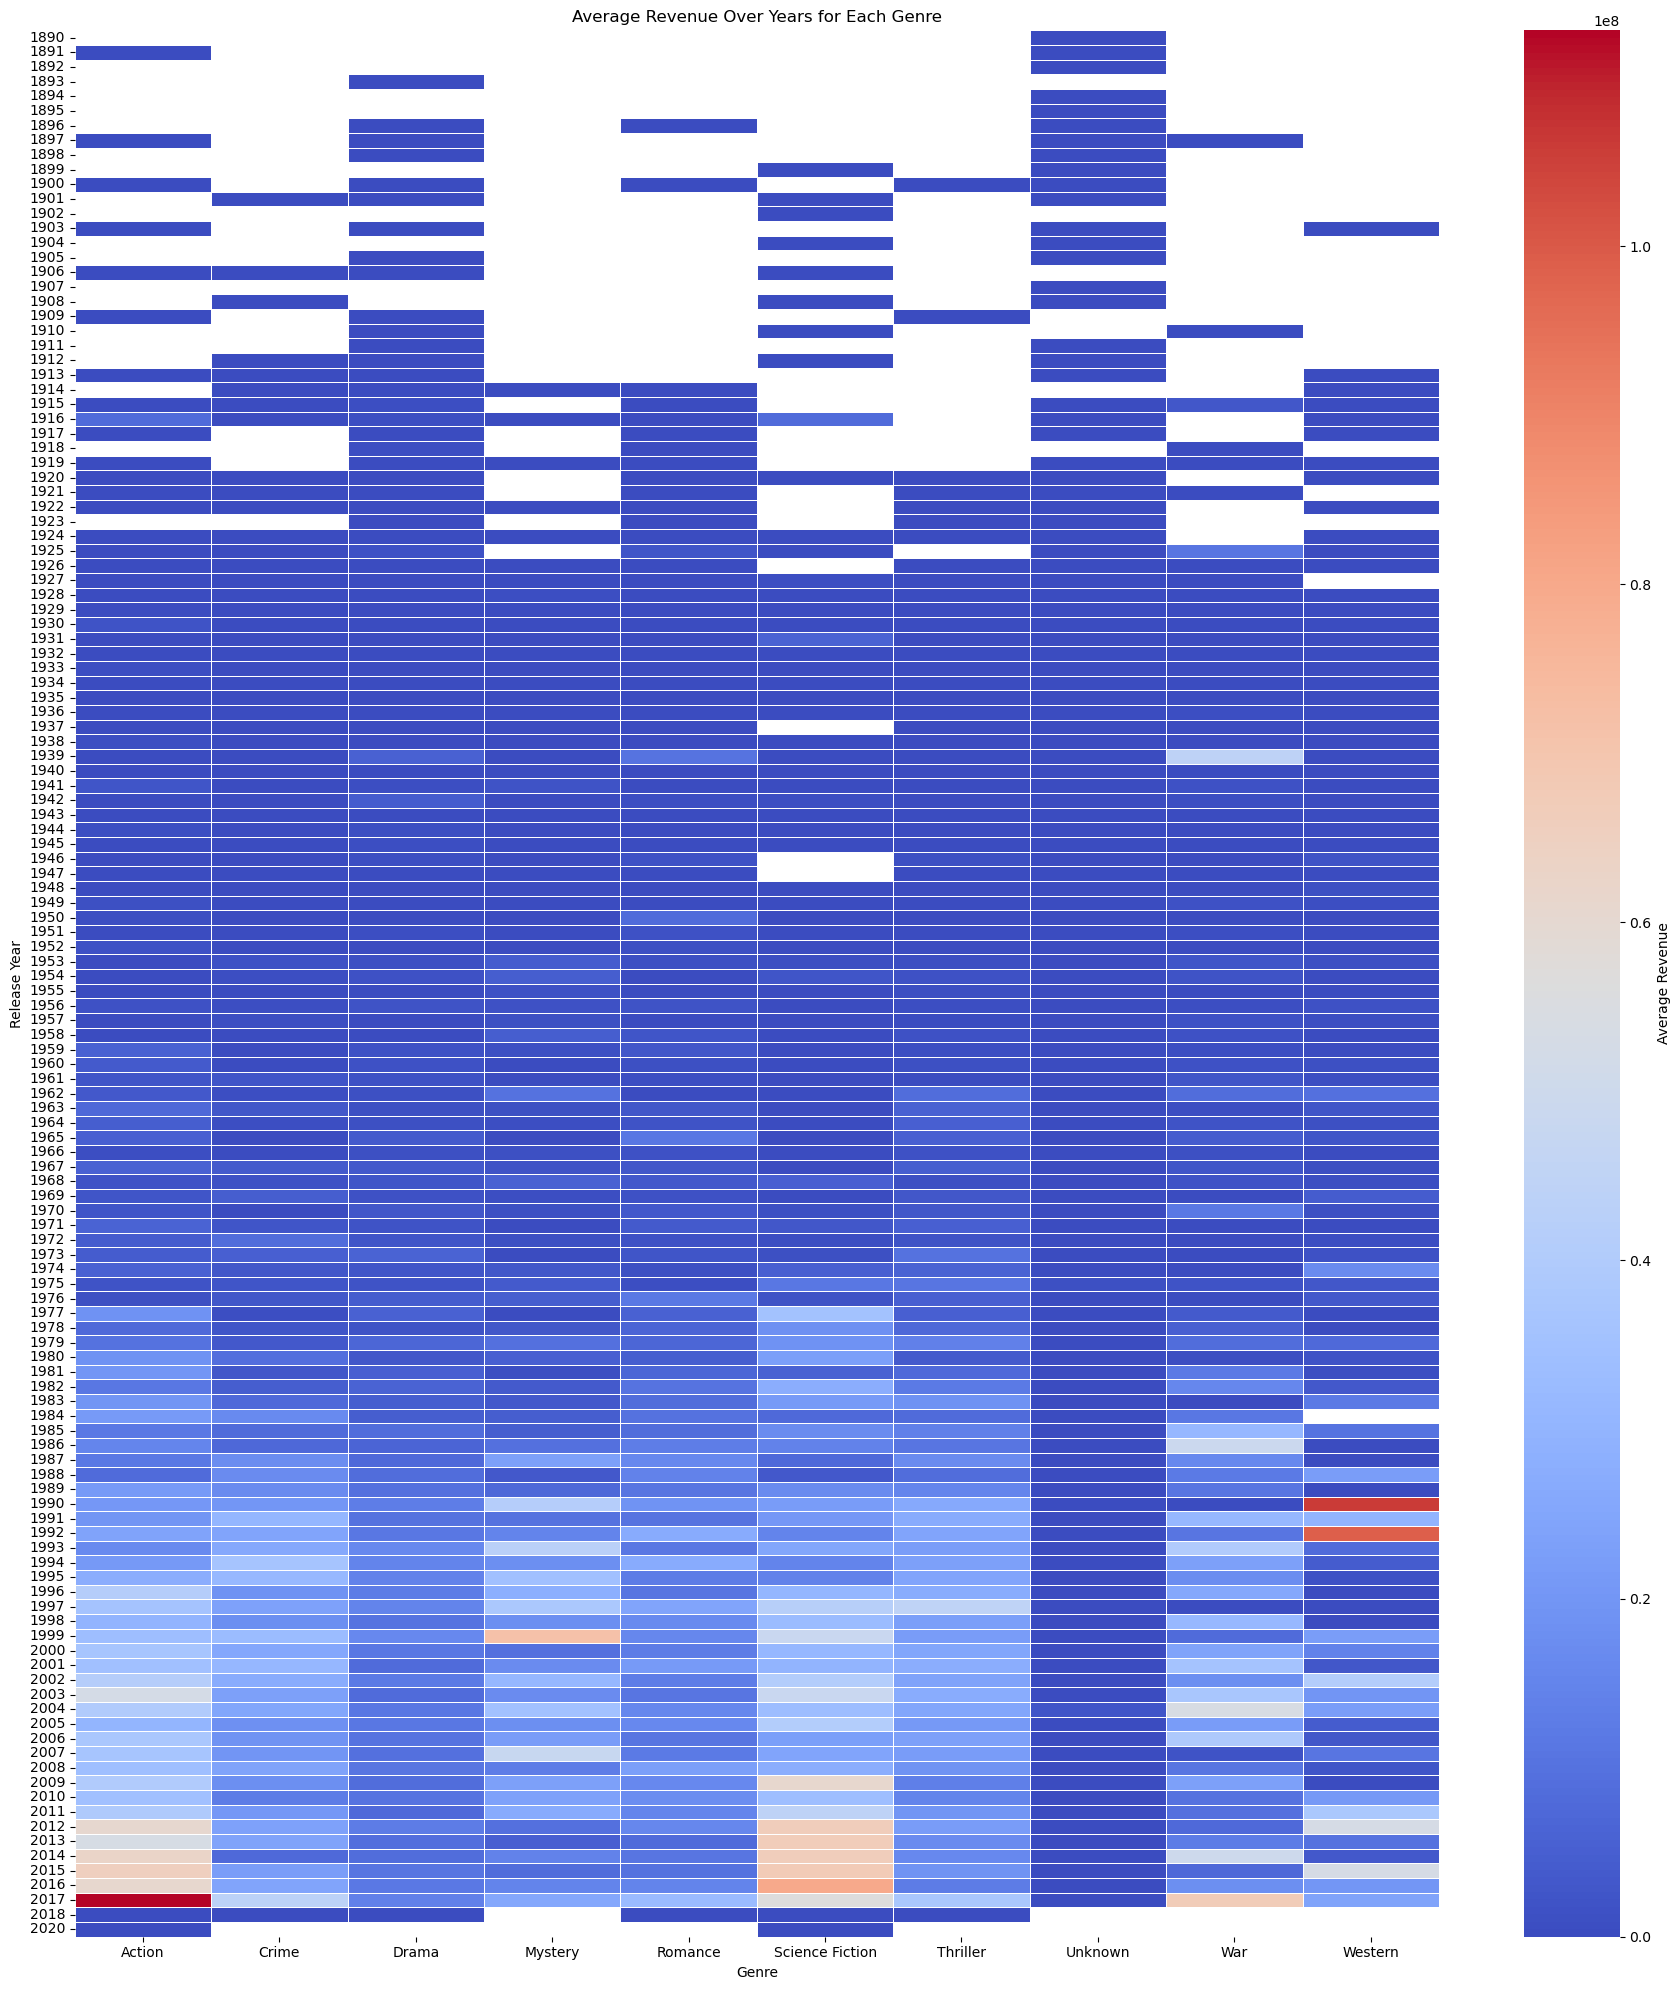

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Ensure your DataFrame 'movies_df' is defined before this code

# Convert 'release_date' to datetime format
movies_df["release_date"] = pd.to_datetime(movies_df["release_date"], errors='coerce')

# Extract year from 'release_date'
movies_df["release_year"] = movies_df["release_date"].dt.year

# Calculate the number of genres each movie belongs to
movies_df["num_genres"] = movies_df[genre_columns].sum(axis=1)

# Initialize lists to store data for each genre
genre_revenue_data = []

# Loop through each genre and calculate revenue over years
for genre in genre_columns:
    # Group by release year and calculate average revenue for each genre
    revenue_data = movies_df[movies_df[genre] == 1].groupby("release_year")["revenue"].mean().reset_index()
    revenue_data["genre"] = genre
    genre_revenue_data.append(revenue_data)

# Concatenate data for each genre
genre_revenue_df = pd.concat(genre_revenue_data, ignore_index=True)

# Pivot the data for the heatmap
heatmap_data = genre_revenue_df.pivot("release_year", "genre", "revenue")

# Visualize the data using heatmap
plt.figure(figsize=(18, 20))  

sns.heatmap(heatmap_data, cmap="coolwarm", linewidths=.5, cbar_kws={'label': 'Average Revenue'})
plt.title("Average Revenue Over Years for Each Genre")
plt.xlabel("Genre")
plt.ylabel("Release Year")

# Set y-axis labels to show years without .0 suffix
y_labels = [int(year) for year in heatmap_data.index]
plt.yticks(ticks=np.arange(len(y_labels))+0.5, labels=y_labels, rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


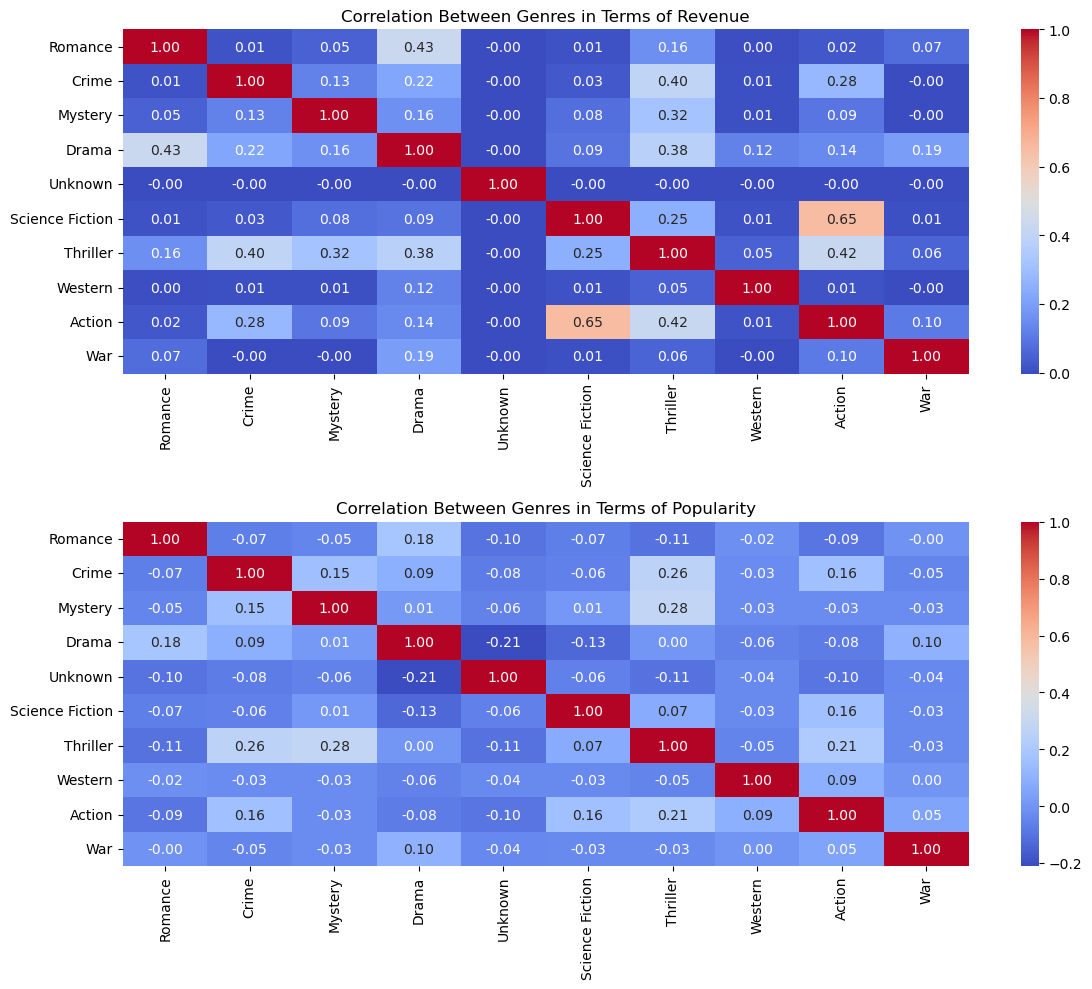

In [29]:
# Correlation Heatmap for Revenue and Popularity (number of movies)
plt.figure(figsize=(12, 10))

# Calculate correlation matrix for revenue
revenue_corr = movies_df[genre_columns].mul(movies_df["revenue"], axis=0).corr()

# Calculate correlation matrix for popularity
popularity_corr = movies_df[genre_columns].corr()

# Plot heatmaps
plt.subplot(2, 1, 1)
sns.heatmap(revenue_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Genres in Terms of Revenue")

plt.subplot(2, 1, 2)
sns.heatmap(popularity_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Genres in Terms of Popularity")

plt.tight_layout()
plt.show()


In [30]:
movies_df = movies_df.loc[:, ~movies_df.columns.duplicated()]

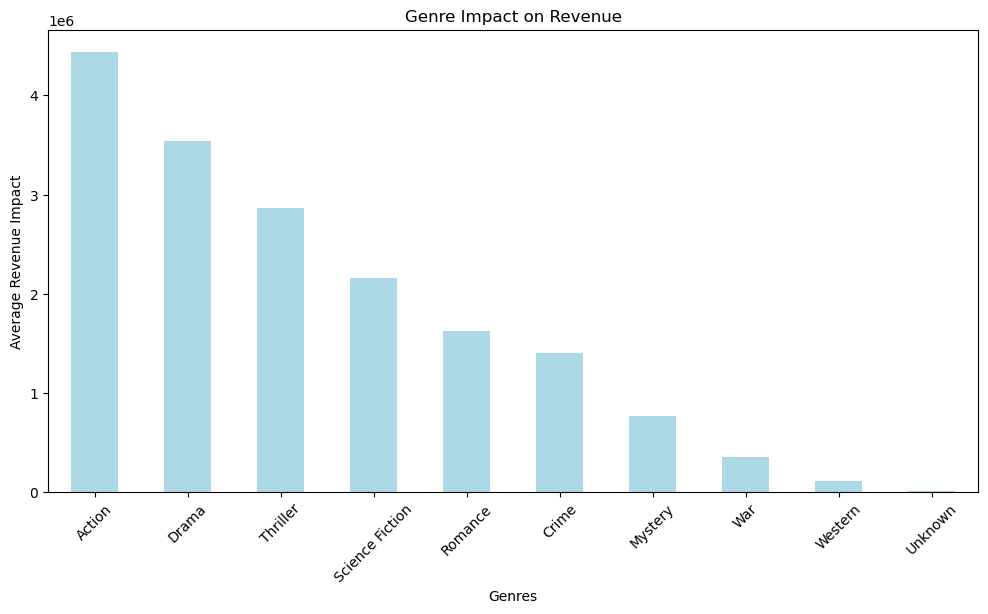

In [31]:
# Genre Impact on Revenue
plt.figure(figsize=(12, 6))

# Calculate revenue impact for each genre
genre_revenue_impact = movies_df[genre_columns].mul(movies_df["revenue"], axis=0).mean()

# Plot the revenue impact
genre_revenue_impact.sort_values(ascending=False).plot(kind="bar", color="lightblue")
plt.title("Genre Impact on Revenue")
plt.xlabel("Genres")
plt.ylabel("Average Revenue Impact")
plt.xticks(rotation=45)
plt.show()
